In [32]:
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("MINDsmall_train/news.tsv", sep='\t', names=["newsId", "category", "subcategory", "title","abstract", "url", "title_entities","abstract_entities"])
data.head()

,newsId,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [39]:
behaviors = pd.read_csv("MINDsmall_train/behaviors.tsv", sep='\t', names=["ImpressionID", "Userid", "Time","History", "Impressions", "Title_entities"])
behaviors.head()

,ImpressionID,Userid,Time,History,Impressions,Title_entities
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0,NaN
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...,NaN
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...,NaN
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0,NaN
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...,NaN


### Total number of clicks

In [36]:
# Extract click information from the "Impressions" column
behaviors['Click'] = behaviors['Impressions'].apply(lambda x: int(x.split('-')[-1]))

# Count the total number of clicks
total_clicks = behaviors['Click'].sum()

print(f'Total number of clicks: {total_clicks}')

Total number of clicks: 17033


### Number of clicks per article

Article ID	Number of Clicks
N17933:	62
N54655:	44
N33513:	41
N12098:	40
N47719:	40
N37977:	37
N5123:	37
N20263:	36
N24827:	36
N13537:	35
N54950:	35
N46911:	34
N62931:	34
N7815:	34
N21241:	33
N4690:	33
N19594:	33
N55829:	33
N39556:	32
N51591:	32
N56253:	32
N7432:	32
N59873:	32
N28936:	32
N13233:	31
N306:	30
N53568:	30
N8473:	30
N25982:	30
N13537:	30
N51591:	29
N34037:	29
N51111:	29
N54359:	29
N2000:	29
N32979:	29
N46622:	28
N24827:	28
N58957:	28
N36424:	28
N55189:	28
N21577:	28
N51591:	28
N8316:	28
N64727:	27
N35009:	27
N3524:	27
N17933:	27
N932:	27
N59873:	27
N13559:	27
N33713:	27
N51591:	27
N15204:	26
N43954:	26
N16496:	26
N10059:	26
N7432:	26
N29438:	26
N11948:	26
N43142:	26
N9343:	26
N32518:	26
N17419:	26
N2028:	26
N23113:	25
N6552:	25
N25740:	25
N17587:	25
N62620:	25
N35671:	25
N9304:	25
N61887:	25
N31224:	25
N8185:	25
N39556:	25
N17933:	25
N17929:	25
N38753:	24
N38688:	24
N30269:	24
N50698:	24
N21241:	24
N7432:	24
N21577:	24
N52097:	24
N44277:	23
N24827:	23
N22570:	23
N29177:	23
N

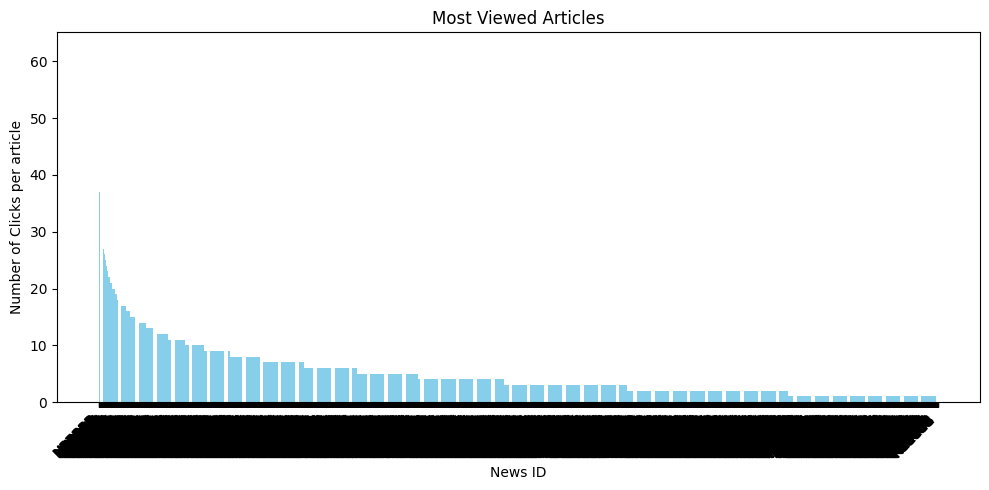

In [38]:
# Group by news articles and count the clicks
clicks_per_article = behaviors.groupby('History').size()

# Sort the articles by the number of clicks in descending order
sorted_clicks_per_article = clicks_per_article.sort_values(ascending=False)

# Print the article ID and number of clicks for each article
print("Article ID\tNumber of Clicks")
news_list = []
click_list = []
for news_id, clicks in sorted_clicks_per_article.items():
    news_split = news_id.split()
    first_element = news_split[0]
    news_list.append(first_element)
    click_list.append(clicks)
    print(f'{first_element}:\t{clicks}')

plt.figure(figsize=(10, 5))
plt.bar(news_list[:len(click_list)], click_list, color='skyblue')
plt.xlabel('News ID')
plt.ylabel('Number of Clicks per article')
plt.title('Most Viewed Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()
